# 1. Import Necessary Libraries

In [2]:
# Core Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

# Set color palette for Seaborn
colors = ["#26536f", "#3b96b7", "#749ca8", "#b6a98d", "#c78a4d", "#854927"]
sns.set_palette(colors)

# Text Processing Libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from nltk import ngrams

# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Machine Learning Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, 
    confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Reading, Merging and Looking at Data

In [3]:
# Reading files into DataFrames
df_items = pd.read_csv("olist_order_items_dataset.csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")
df_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_payments = pd.read_csv("olist_order_payments_dataset.csv")
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_category = pd.read_csv("product_category_name_translation.csv")

In [7]:
# Merging Dataframes
df = df_orders.merge(df_items, on='order_id', how='inner')
df = df.merge(df_payments, on='order_id', how='inner', validate='m:m')
df = df.merge(df_reviews, on='order_id', how='inner')
df = df.merge(df_products, on='product_id', how='inner')
df = df.merge(df_customers, on='customer_id', how='inner')
df = df.merge(df_sellers, on='seller_id', how='inner')
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2017-10-18 00:00:00              1   
2           2017-10-18 00:00:00              1   
3           2018-08-13 00:00:00              1   
4           2018-09-04 00:00:00              1   

                         product_id  ... product_length_cm product_height_cm  \
0  87285b34884572647811a353c7ac498a  ...              19.0               8.0   
1  87285b34884572647811a353c7ac498a  ...              19.0               8.0   
2  87285b34884572647811a353c7ac498a  ...              19.0               8.0   
3  595fac2a385ac33a80bd5114aec74eb8  ...              19.0              13.0   
4  aa4383b373c6aca5d8797843e5594415  ...              24.0              19.0   

   product_width_cm                customer_unique_id  \
0              13.0  7c396fd4830fd04220f754e42b4e5bff   
1              13.0  7c396fd4830fd04220f754e42b4e5bff   
2              13.0  7c396fd4830fd04220f754e42b4e5bff   
3              19.0  af07308b275d755c9edb36a90c618231   
4              21.0  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city  customer_state  \
0                      3149     sao paulo              SP   
1                      3149     sao paulo              SP   
2                      3149     sao paulo              SP   
3                     47813     barreiras              BA   
4                     75265    vianopolis              GO   

   seller_zip_code_prefix     seller_city  seller_state  
0                    9350            maua            SP  
1                    9350            maua            SP  
2                    9350            maua            SP  
3                   31570  belo horizonte            SP  
4                   14840         guariba            SP  

[5 rows x 39 columns]

In [10]:
df = df.sample(10000)
df

order_id                       customer_id  \
13763  8e3944fa77034393e3a23b589af8e3ba  6fd3619d8a965e95354f90d106e9c08c   
1547   a3f03305225173eb1cf3ea5eeb32e583  74e3e653fa67f92300809f4369b0f8de   
40795  4c5ca64fb9410a3ee7bc041df508a9b8  452a6d55f932885a9313ee6255cb3e73   
84179  2dd30e05504d2714a28029f29ea95d80  895c0718eaf80a1be69a2b3c0ec144b6   
90403  67e7cace5deab160cedd95c80e6f60a8  58a02b0700dd28cd6317626512912c3f   
...                                 ...                               ...   
80556  68c3db91b9a3d1ad879db9e54d426f4d  d99ff94021e8cdd83a79c28812f1d6e2   
43054  11c931d6ce4eaf462a90dd1248a767fd  73d3109d331fc1a1ab21f489b3979ef8   
40909  f0a3681de8bc46b204500087357b2a89  4ccd5436cac2c43451cdc82952924d45   
42377  114fade4f3b82f8b065771e1b3c0ae14  16961e4900ce6f06e72342487ffe2297   
53770  1196240b71cd166c2b75a3a0c9ded394  310e750a3574d84c0221e3e9e1a3b304   

      order_status order_purchase_timestamp    order_approved_at  \
13763    delivered      2017-10-16 23:38:27  2017-10-16 23:49:21   
1547     delivered      2017-08-31 10:45:07  2017-08-31 11:04:36   
40795    delivered      2017-08-17 20:31:00  2017-08-18 20:44:28   
84179    delivered      2018-06-23 23:04:33  2018-06-23 23:39:16   
90403    delivered      2017-07-17 22:42:24  2017-07-20 13:43:32   
...            ...                      ...                  ...   
80556    delivered      2017-06-07 11:48:48  2017-06-07 12:43:07   
43054    delivered      2018-01-24 20:56:37  2018-01-24 21:18:22   
40909    delivered      2018-02-08 17:14:59  2018-02-08 17:50:48   
42377    delivered      2018-01-15 22:29:00  2018-01-15 23:30:27   
53770    delivered      2017-09-02 18:52:25  2017-09-02 19:10:12   

      order_delivered_carrier_date order_delivered_customer_date  \
13763          2017-10-19 18:03:33           2017-10-24 22:23:39   
1547           2017-09-04 13:14:59           2017-09-11 18:58:50   
40795          2017-08-23 19:23:19           2017-08-28 17:52:00   
84179          2018-06-25 15:49:00           2018-06-27 18:03:44   
90403          2017-07-21 17:52:16           2017-07-27 18:35:33   
...                            ...                           ...   
80556          2017-06-07 15:58:40           2017-06-19 09:51:43   
43054          2018-01-26 21:49:00           2018-02-22 23:09:15   
40909          2018-02-09 20:16:33           2018-02-16 18:45:08   
42377          2018-01-18 20:46:52           2018-02-02 05:39:43   
53770          2017-09-05 13:47:00           2017-09-12 18:21:35   

      order_estimated_delivery_date  order_item_id  \
13763           2017-11-01 00:00:00              1   
1547            2017-09-20 00:00:00              1   
40795           2017-09-11 00:00:00              1   
84179           2018-07-17 00:00:00              2   
90403           2017-08-10 00:00:00              1   
...                             ...            ...   
80556           2017-06-30 00:00:00              1   
43054           2018-02-22 00:00:00              1   
40909           2018-03-08 00:00:00              1   
42377           2018-02-05 00:00:00              1   
53770           2017-09-21 00:00:00              1   

                             product_id  ... product_length_cm  \
13763  dde7139085b54e2ea1771a2f9964d344  ...              36.0   
1547   46e4940f28c9231a801873e62ca55c53  ...              30.0   
40795  8a12254c44b230303e05d8e1cb4be350  ...             104.0   
84179  b0961721fd839e9982420e807758a2a6  ...              37.0   
90403  601a360bd2a916ecef0e88de72a6531a  ...              42.0   
...                                 ...  ...               ...   
80556  99a4788cb24856965c36a24e339b6058  ...              50.0   
43054  aca2eb7d00ea1a7b8ebd4e68314663af  ...              50.0   
40909  8c81ff84f8301d0db2fbfde90da0f5a5  ...              20.0   
42377  2216232cbfdfdc984d20cd53acb7aba8  ...              40.0   
53770  f1959b60fe1d6a15ca43bb20078bbae1  ...              50.0   

      product_height_cm  produ

In [11]:
df.shape

(10000, 39)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 13763 to 53770
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       10000 non-null  object 
 1   customer_id                    10000 non-null  object 
 2   order_status                   10000 non-null  object 
 3   order_purchase_timestamp       10000 non-null  object 
 4   order_approved_at              9999 non-null   object 
 5   order_delivered_carrier_date   9895 non-null   object 
 6   order_delivered_customer_date  9781 non-null   object 
 7   order_estimated_delivery_date  10000 non-null  object 
 8   order_item_id                  10000 non-null  int64  
 9   product_id                     10000 non-null  object 
 10  seller_id                      10000 non-null  object 
 11  shipping_limit_date            10000 non-null  object 
 12  price                          10000 non-null  

In [13]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   1
order_delivered_carrier_date      105
order_delivered_customer_date     219
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_comment_title             8815
review_comment_message           5669
review_creation_date                0
review_answer_timestamp             0
product_category_name             128
product_name_lenght               128
product_desc

In [14]:
# Ensure timestamps are in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Create useful features from order_purchase_timestamp
df['day_of_week_int'] = df['order_purchase_timestamp'].dt.weekday + 1  # Day of week as integer (1 = Monday, etc.)
df['hour'] = df['order_purchase_timestamp'].dt.hour                    # Hour of day
df['month'] = df['order_purchase_timestamp'].dt.month                  # Month as integer
df['year'] = df['order_purchase_timestamp'].dt.year                    # Year as integer
df['date'] = df['order_purchase_timestamp'].dt.to_period('M')          # Monthly period for time series analysis

# Calculate delivery time in days
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [15]:
# Renaming the column to correct the spelling
df.rename(columns={'product_name_lenght': 'product_name_length'}, inplace=True)

# 3. Exploratory Data Analysis


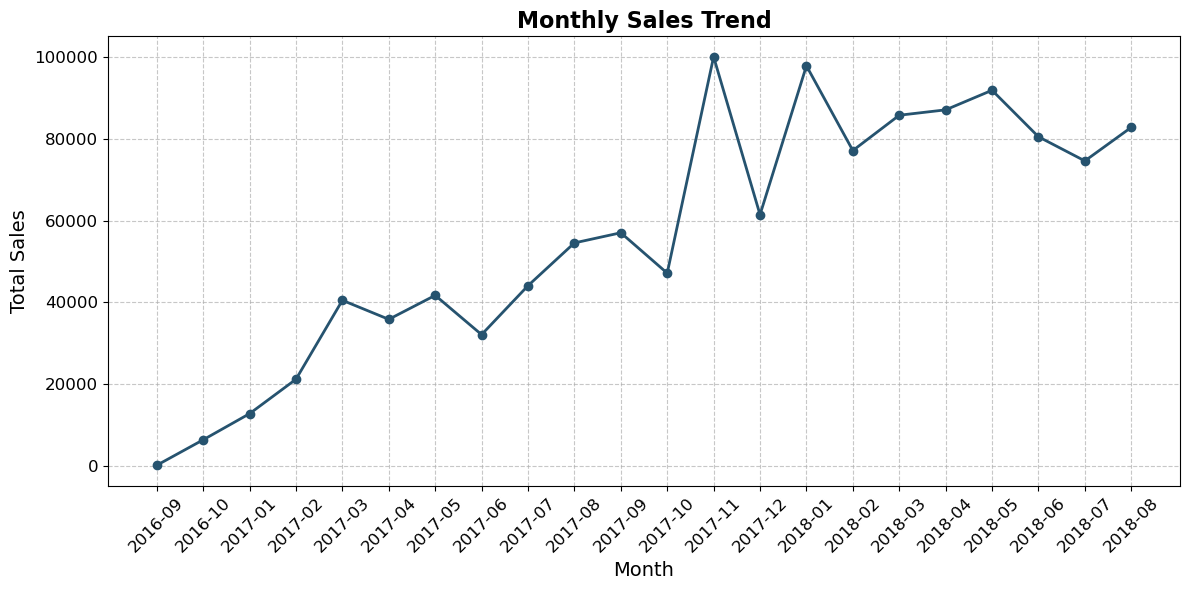

In [16]:
# Monthly sales trend
monthly_sales = df.groupby(df['order_purchase_timestamp'].dt.to_period('M')).agg({'price': 'sum'})

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Plot the data with custom colors
plt.plot(monthly_sales.index.astype(str), monthly_sales['price'], 
         marker='o', linestyle='-', color=colors[0], linewidth=2)

# Adding titles and labels
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Customize the ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

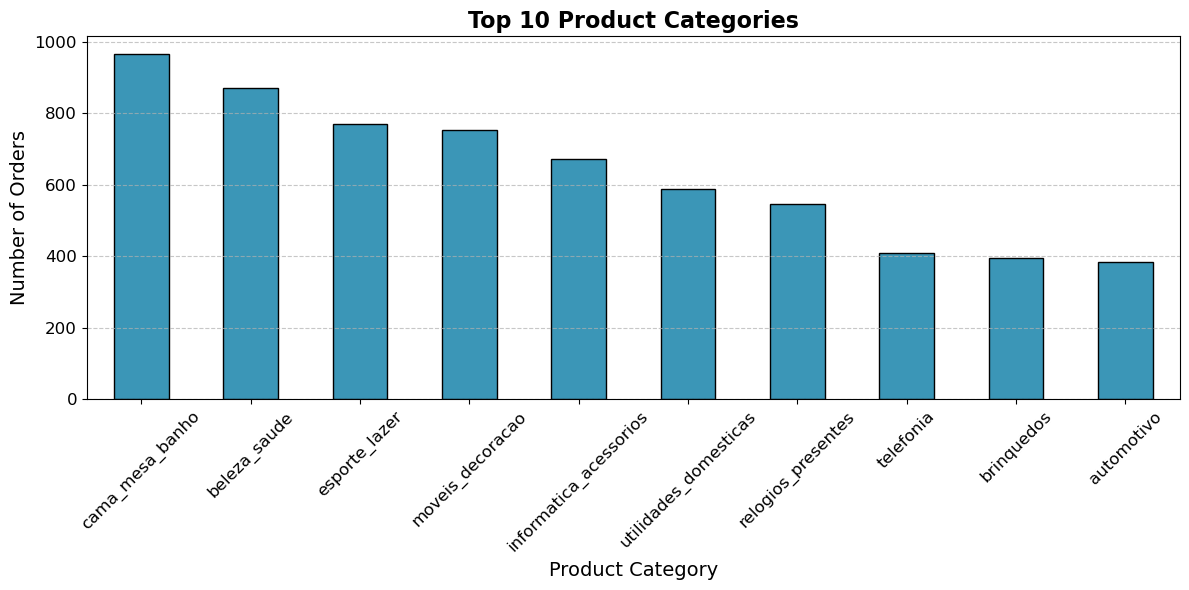

In [17]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Example: Orders by product category
top_categories = df['product_category_name'].value_counts().head(10)
top_categories.plot(kind='bar',color=colors[1], edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

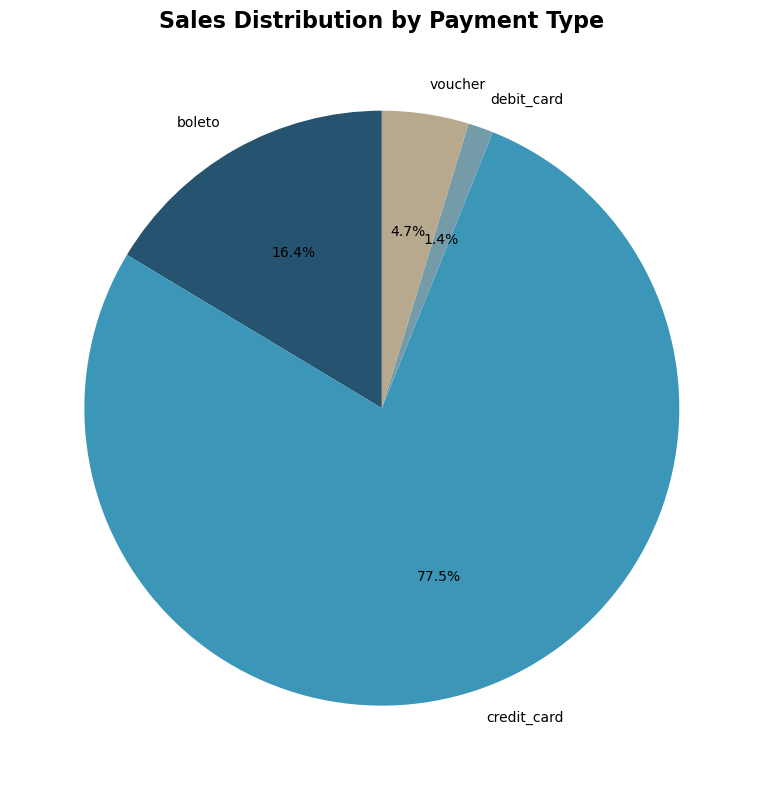

In [18]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Example: Proportion of total sales by payment type
sales_by_payment = df.groupby('payment_type')['price'].sum()
sales_by_payment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# Adding title
plt.title('Sales Distribution by Payment Type', fontsize=16, fontweight='bold')

# Hide the y-label for better aesthetics
plt.ylabel('')

plt.tight_layout()
plt.show()

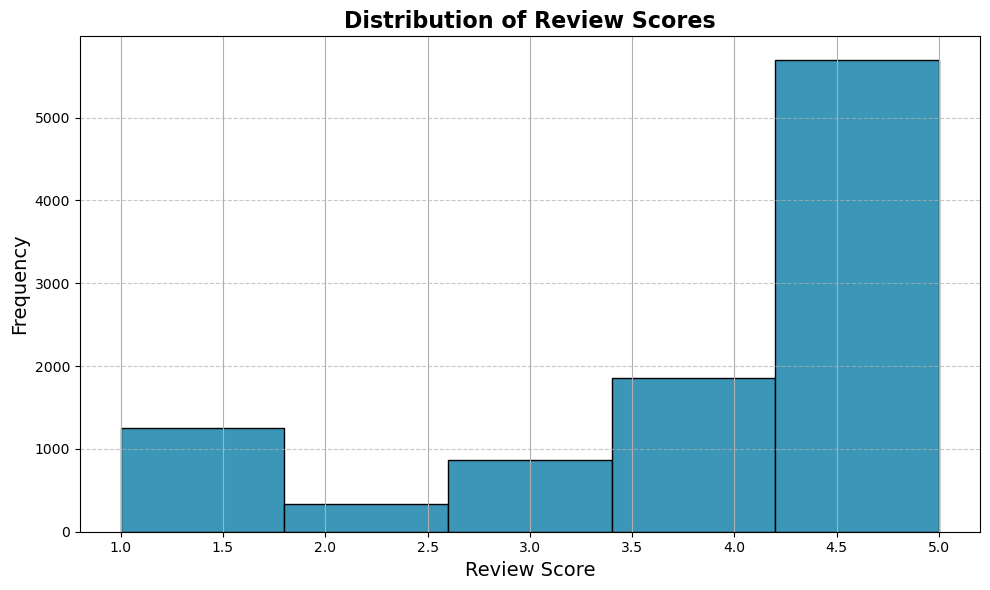

In [19]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Example: Distribution of review scores
df['review_score'].hist(bins=5, color=colors[1], edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Review Scores', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

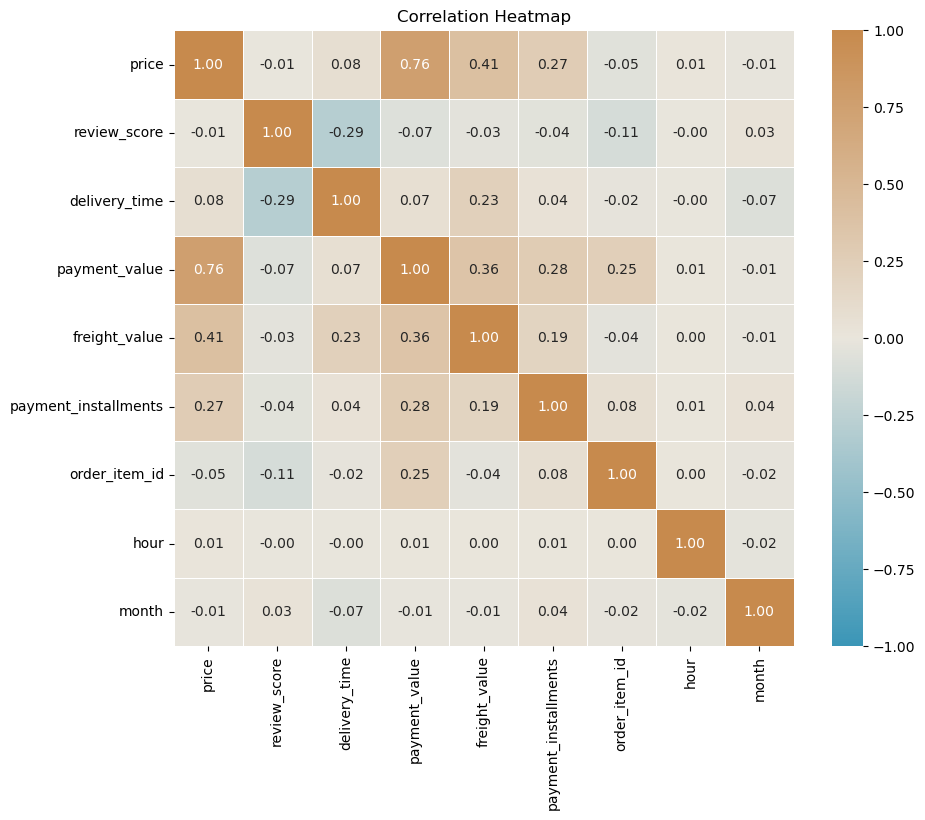

In [20]:
# Select relevant features for correlation analysis
correlation_features = df[['price', 'review_score', 'delivery_time', 
                            'payment_value', 'freight_value', 
                            'payment_installments', 'order_item_id', 
                            'hour', 'month']]

# Calculate the correlation matrix
correlation = correlation_features.corr()

# Define the custom colormap
custom_colors = ['#3B96B7', '#E9E5DC', '#C78A4D']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap=custom_cmap, vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# Count the occurrences of each product category
category_counts = df['product_category_name'].value_counts()

# Set a threshold to decide which categories to keep
threshold = 3000  
common_categories = category_counts[category_counts >= threshold].index

# Create a new column for simplified categories
df['simplified_category'] = df['product_category_name'].where(df['product_category_name'].isin(common_categories), 'Other')

C:\Users\User\AppData\Local\Temp\ipykernel_10132\1530166084.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='delivery_time', y='simplified_category', data=df, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\1530166084.py:4: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(x='delivery_time', y='simplified_category', data=df, palette=colors)


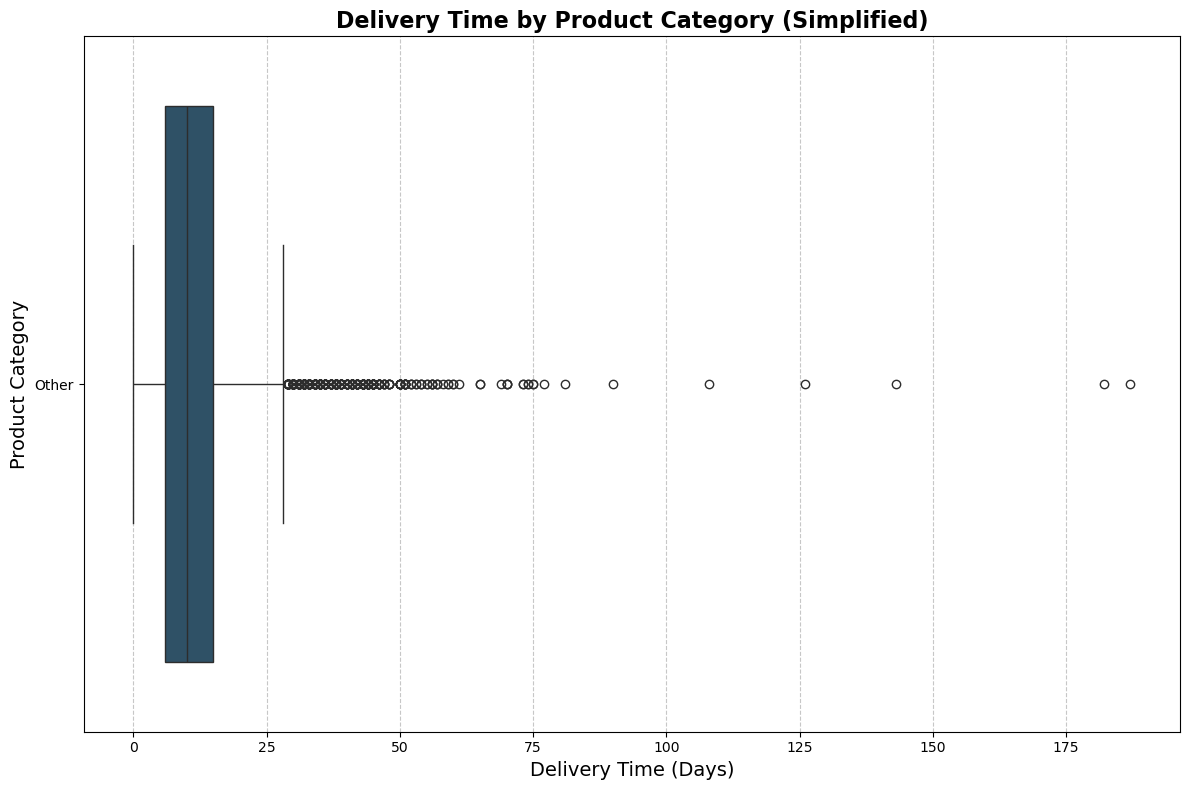

In [22]:
plt.figure(figsize=(12, 8))

# Horizontal box plot for delivery time by simplified product category
sns.boxplot(x='delivery_time', y='simplified_category', data=df, palette=colors)

# Overlay swarm plot to show individual points
#sns.swarmplot(x='delivery_time', y='simplified_category', data=df, color='k', alpha=0.6, size=3)

# Adding titles and labels
plt.title('Delivery Time by Product Category (Simplified)', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10132\145552379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='day_of_week_int', y='delivery_time', palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\145552379.py:2: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df, x='day_of_week_int', y='delivery_time', palette=colors)


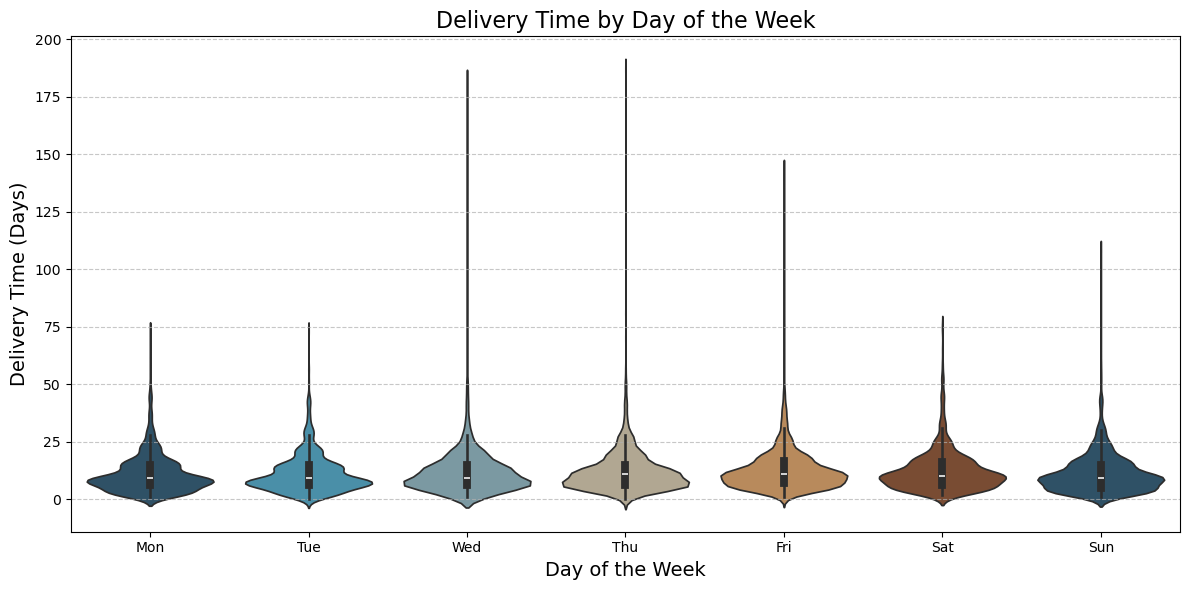

In [23]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='day_of_week_int', y='delivery_time', palette=colors)
plt.title('Delivery Time by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Delivery Time (Days)', fontsize=14)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10132\180239050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_year', y='delivery_time', data=monthly_delivery_time, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\180239050.py:7: UserWarning: 
The palette list has fewer values (6) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='month_year', y='delivery_time', data=monthly_delivery_time, palette=colors)


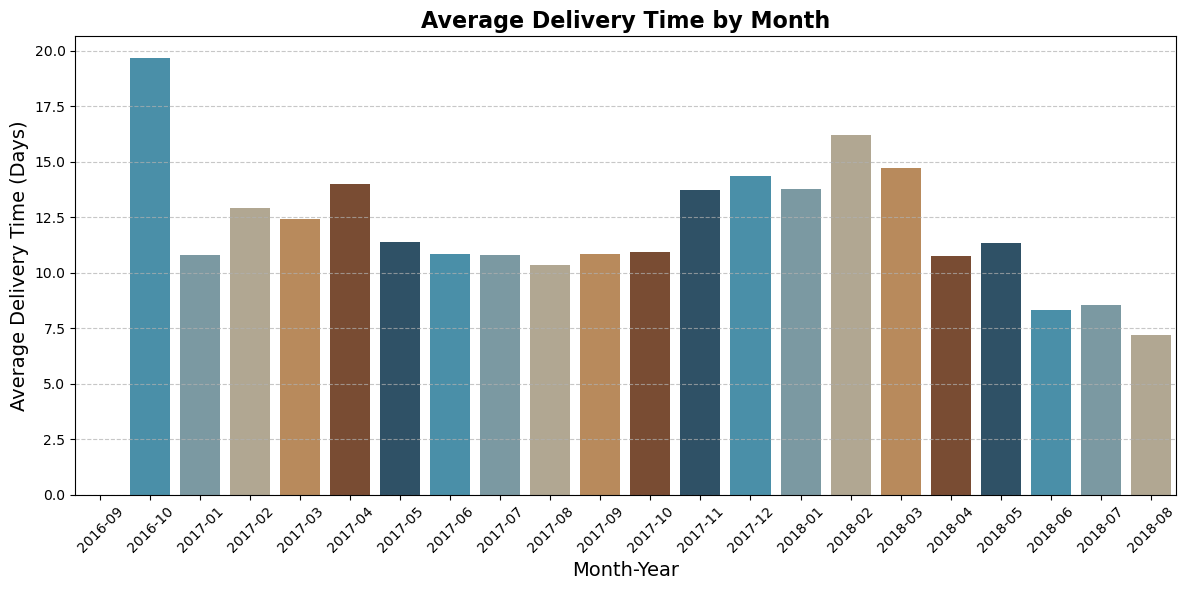

In [24]:
# Create a new DataFrame for the monthly average delivery time
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_delivery_time = df.groupby('month_year')['delivery_time'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month_year', y='delivery_time', data=monthly_delivery_time, palette=colors)
plt.title('Average Delivery Time by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Average Delivery Time (Days)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

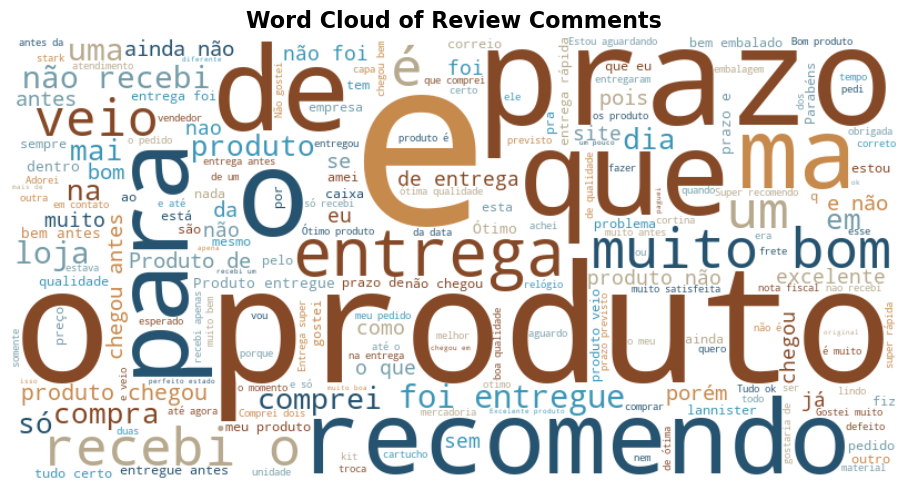

In [25]:
# Define a color function
def color_func(word, font_size, position, orientation, random_state=42, **kwargs):
    return random.choice(colors)

# Example: Word cloud from review comments
plt.figure(figsize=(10, 5))

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(' '.join(df['review_comment_message'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Review Comments', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Natural Language Processing (NLP)

In [26]:
# Selecting only necessary columns for NLP analysis
nlp_df = df[['review_comment_title', 'review_comment_message', 'product_category_name']]
# dataset
nlp_df

review_comment_title                             review_comment_message  \
13763                  NaN  Porém a caixa veio toda amassada e o pior é qu...   
1547                   NaN                                                NaN   
40795                  NaN                                                NaN   
84179                  NaN                                                NaN   
90403                  NaN                                                NaN   
...                    ...                                                ...   
80556                  NaN                                                NaN   
43054                  NaN                                                NaN   
40909                  NaN                         Produto aparentemente bom.   
42377                  NaN                produto além da expectativa!!!!!!!!   
53770                  NaN                                                NaN   

       product_category_name  
13763          esporte_lazer  
1547              perfumaria  
40795       moveis_decoracao  
84179     ferramentas_jardim  
90403             cool_stuff  
...                      ...  
80556        cama_mesa_banho  
43054       moveis_decoracao  
40909              papelaria  
42377  utilidades_domesticas  
53770        cama_mesa_banho  

[10000 rows x 3 columns]

In [27]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 13763 to 53770
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_title    1185 non-null   object
 1   review_comment_message  4331 non-null   object
 2   product_category_name   9872 non-null   object
dtypes: object(3)
memory usage: 312.5+ KB


In [28]:
print("There are {} product categories in the dataset.".format(nlp_df.product_category_name.nunique()))

There are 70 product categories in the dataset.


# 5. Data Cleaning

In [29]:
# Calculating the total number of NaN values in each column of the DataFrame 'nlp_df'
nan_counts = nlp_df.isna().sum()
nan_counts

review_comment_title      8815
review_comment_message    5669
product_category_name      128
dtype: int64

In [30]:
# Calculating the total number of NaN values in the 'review_comment_message' column of 'nlp_df'
nan_count_review_comment_message = nlp_df['review_comment_message'].isna().sum()
nan_count_review_comment_message

5669

In [31]:
def remove_duplicates_nlp_df(nlp_df, column_name='review_comment_message'):
    
    # Remove duplicates based on the specified column, keeping the first occurrence
    nlp_df = nlp_df.drop_duplicates(subset=[column_name], keep='first').reset_index(drop=True)
    
    # Display the total entries after removing duplicates
    print(f"Total entries after removing duplicates in '{column_name}': {nlp_df.shape[0]}")
    
    return nlp_df

# Remove duplicates from 'nlp_df' based on the 'review_comment_message' column
nlp_df = remove_duplicates_nlp_df(nlp_df, 'review_comment_message')

# Display the first few records to verify
nlp_df.head()

Total entries after removing duplicates in 'review_comment_message': 3969


review_comment_title                             review_comment_message  \
0                  NaN  Porém a caixa veio toda amassada e o pior é qu...   
1                  NaN                                                NaN   
2                  NaN  demorou um pouco por causa da greve dos correi...   
3                  NaN  Produto bom correspondente com as informações ...   
4                  NaN  Os frasco vieram todos danificados parecendo p...   

    product_category_name  
0           esporte_lazer  
1              perfumaria  
2  informatica_acessorios  
3                   bebes  
4              perfumaria

In [32]:
def clean_reviews(df):
    
    # Remove rows where 'review_comment_message' is empty
    df = df.dropna(subset=['review_comment_message', 'review_comment_title', 'product_category_name']).reset_index(drop=True)

    # Remove duplicate rows
    df = df.drop_duplicates(subset=['review_comment_message'])

    return df

# Assuming 'nlp_df' is your dataframe
df_cleaned = clean_reviews(nlp_df)

# Display the first records to check
df_cleaned.head()

review_comment_title                             review_comment_message  \
0                   Es  Poren estou aguardando uma resposta sobre a tr...   
1          Tudo certo!  Produto descrito com clareza, preço acessível,...   
2   entrega em 2 dias!                 chegou tudo certo em prazo recorde   
3            Recomendo                            Entregue antes do prazo   
4               Ótimo                      Muit o bom no prazo combinado6   

     product_category_name  
0       relogios_presentes  
1               automotivo  
2             beleza_saude  
3  sinalizacao_e_seguranca  
4             beleza_saude

# 6. Text Preprocessing

In [33]:
# Define Portuguese stopwords
STOP_WORDS = set(stopwords.words('portuguese'))

# Helper function to clean and tokenize text
def clean_and_tokenize(text):
    # Ensure the text is a string
    if not isinstance(text, str):
        return "", []
    
    # Convert to lowercase, remove punctuation, and split into words
    cleaned_text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = cleaned_text.split()
    
    # Remove stopwords and create tokens
    filtered_words = [word for word in words if word not in STOP_WORDS]
    return " ".join(filtered_words), filtered_words

# Main function to preprocess and clean the dataframe
def preprocess_nlp_df(df):
    # Clean, remove stopwords, and tokenize comments
    df[['review_comment_message_clean', 'review_comment_message_tokens']] = df['review_comment_message'].apply(
        lambda text: pd.Series(clean_and_tokenize(text))
    )
    
    # Remove rows with NaN values in key columns
    df.dropna(subset=['review_comment_title', 'review_comment_message'], inplace=True)
    
    # Drop duplicate rows based on the 'review_comment_message' and 'review_comment_title' columns
    df.drop_duplicates(subset=['review_comment_message', 'review_comment_title'], inplace=True)
    
    return df.reset_index(drop=True)

# Preprocess the dataset 
nlp_df = preprocess_nlp_df(nlp_df)

# Display the first records to check
nlp_df[['review_comment_message', 'review_comment_message_clean', 'review_comment_message_tokens']].head()

review_comment_message  \
0  Poren estou aguardando uma resposta sobre a tr...   
1  Produto descrito com clareza, preço acessível,...   
2                 chegou tudo certo em prazo recorde   
3                            Entregue antes do prazo   
4                     Muit o bom no prazo combinado6   

                        review_comment_message_clean  \
0  poren aguardando resposta sobre troca produto ...   
1  produto descrito clareza preço acessível entre...   
2                    chegou tudo certo prazo recorde   
3                               entregue antes prazo   
4                          muit bom prazo combinado6   

                       review_comment_message_tokens  
0  [poren, aguardando, resposta, sobre, troca, pr...  
1  [produto, descrito, clareza, preço, acessível,...  
2              [chegou, tudo, certo, prazo, recorde]  
3                           [entregue, antes, prazo]  
4                     [muit, bom, prazo, combinado6]

# 7. Sentiment Analysis with LeIA

In [34]:
# Initialize the Sentiment Analyzer once
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(df, column_name='review_comment_message_clean'):
    # Vectorized function to get sentiment classification
    def get_sentiment_classification(text):
        scores = analyzer.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 'Positive'
        elif scores['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    
    # Apply sentiment analysis using map for faster iteration
    df[f'{column_name}_sentiment'] = df[column_name].map(get_sentiment_classification)
    return df

# Classify sentiment in 'nlp_df' based on the 'review_comment_message_clean' column
nlp_df = classify_sentiment(nlp_df, 'review_comment_message_clean')

# Display the sentiment results
nlp_df[['review_comment_message_clean', 'review_comment_message_clean_sentiment']].head(25)

review_comment_message_clean  \
0   poren aguardando resposta sobre troca produto ...   
1   produto descrito clareza preço acessível entre...   
2                     chegou tudo certo prazo recorde   
3                                entregue antes prazo   
4                           muit bom prazo combinado6   
5                           entrega antes prazo ótimo   
6   sempre recomendo lannister pois atendimento ex...   
7          produto recebido corretamente dentro prazo   
8   produto altíssima qualidade tom diferente part...   
9   primeira vez compro gostei entregaram antes da...   
10                               entrega dentro prazo   
11         ótimo confiança pode comprar chegou rápido   
12  entregam residência produto fica agência corre...   
13  produto veio conforme descrição pouco machucad...   
14                faltou 1 luminária aguardando envio   
15                                              ótimo   
16  bom dia recebi segundo produto comprado nessa ...   
17  recebi comprei mandaram outro produto consigo ...   
18  solicitei extensão elétrica 3 entradas deveria...   
19                                    super recomendo   
20                      entrega super rápidamuito bom   
21                                   tudo certo ótimo   
22  prima indicou produto gostou usando agora vou ...   
23  quanto produto nada reclamar targaryen entrega...   
24  comprei tres produtos paguei frete cada recebi...   

   review_comment_message_clean_sentiment  
0                                 Neutral  
1                                 Neutral  
2                                 Neutral  
3                                 Neutral  
4                                 Neutral  
5                                 Neutral  
6                                 Neutral  
7                                 Neutral  
8                                 Neutral  
9                                 Neutral  
10                                Neutral  
11                                Neutral  
12                                Neutral  
13                                Neutral  
14                                Neutral  
15                                Neutral  
16                                Neutral  
17                                Neutral  
18                                Neutral  
19                               Positive  
20                               Positive  
21                                Neutral  
22                                Neutral  
23                                Neutral  
24                                Neutral

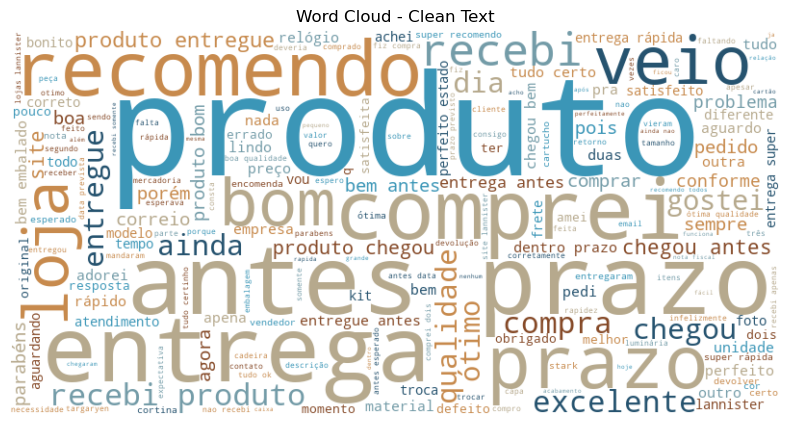

In [35]:
# Concatenate all non-null texts from the 'cleaned_text' column into a single string
text_combined = " ".join(nlp_df['review_comment_message_clean'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Clean Text")
plt.axis("off")  # Remove the axes
plt.show()

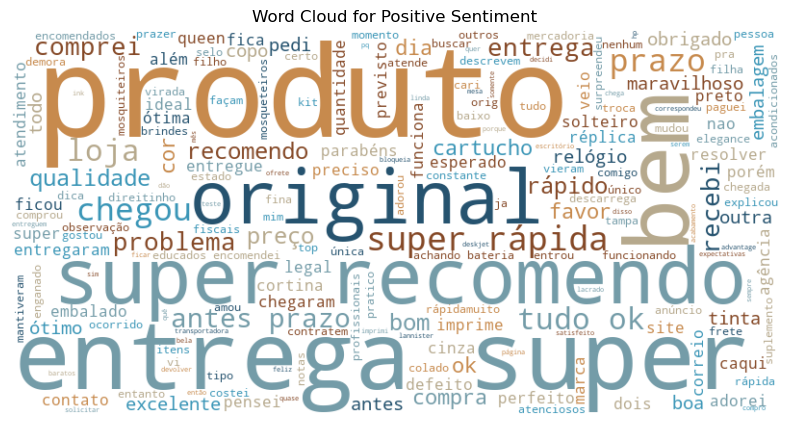

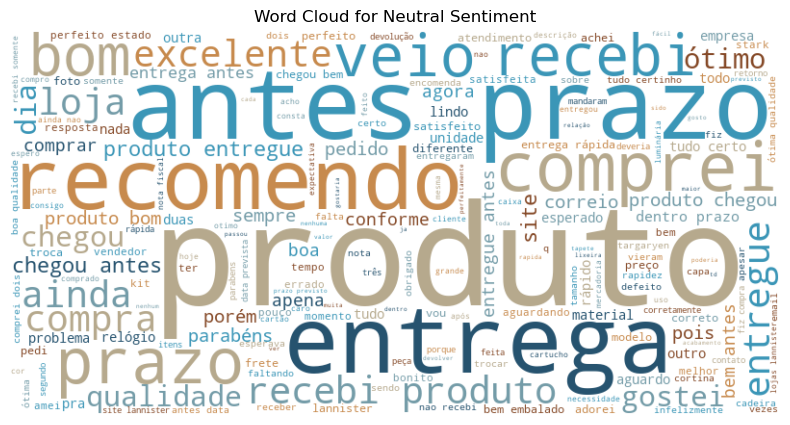

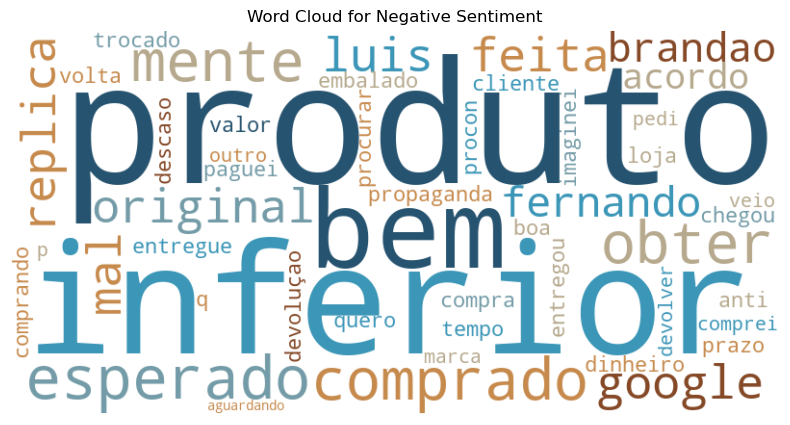

In [36]:
def plot_word_clouds_by_sentiment(df, text_column='review_comment_message_clean', sentiment_column='review_comment_message_clean_sentiment'):
    # Filter text by sentiment
    sentiments = ['Positive', 'Neutral', 'Negative']
    
    for sentiment in sentiments:
        # Filter data by current sentiment
        text_data = " ".join(df[df[sentiment_column] == sentiment][text_column].dropna())
        
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_data)
        
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment} Sentiment')
        plt.show()
        
# Generate word clouds based on sentiment for the specified columns
plot_word_clouds_by_sentiment(nlp_df, 'review_comment_message_clean', 'review_comment_message_clean_sentiment')

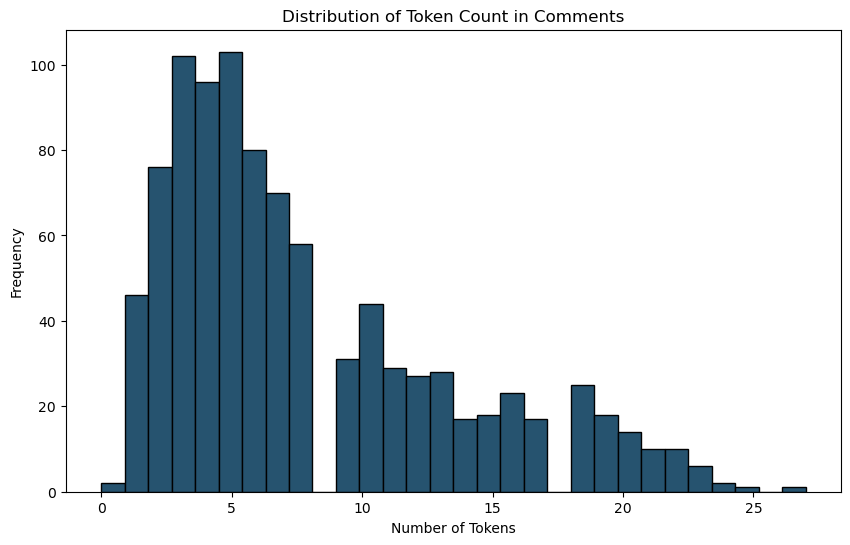

In [37]:
def plot_token_count_distribution(df, token_column='review_comment_message_tokens'):
    # Calculate the number of tokens for each entry
    df['token_count'] = df[token_column].apply(len)
    
    # Plot the distribution of token counts
    plt.figure(figsize=(10, 6))
    plt.hist(df['token_count'], bins=30, edgecolor='black')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.title('Distribution of Token Count in Comments')
    plt.show()
    
# Generate the token count distribution plot
plot_token_count_distribution(nlp_df, 'review_comment_message_tokens')

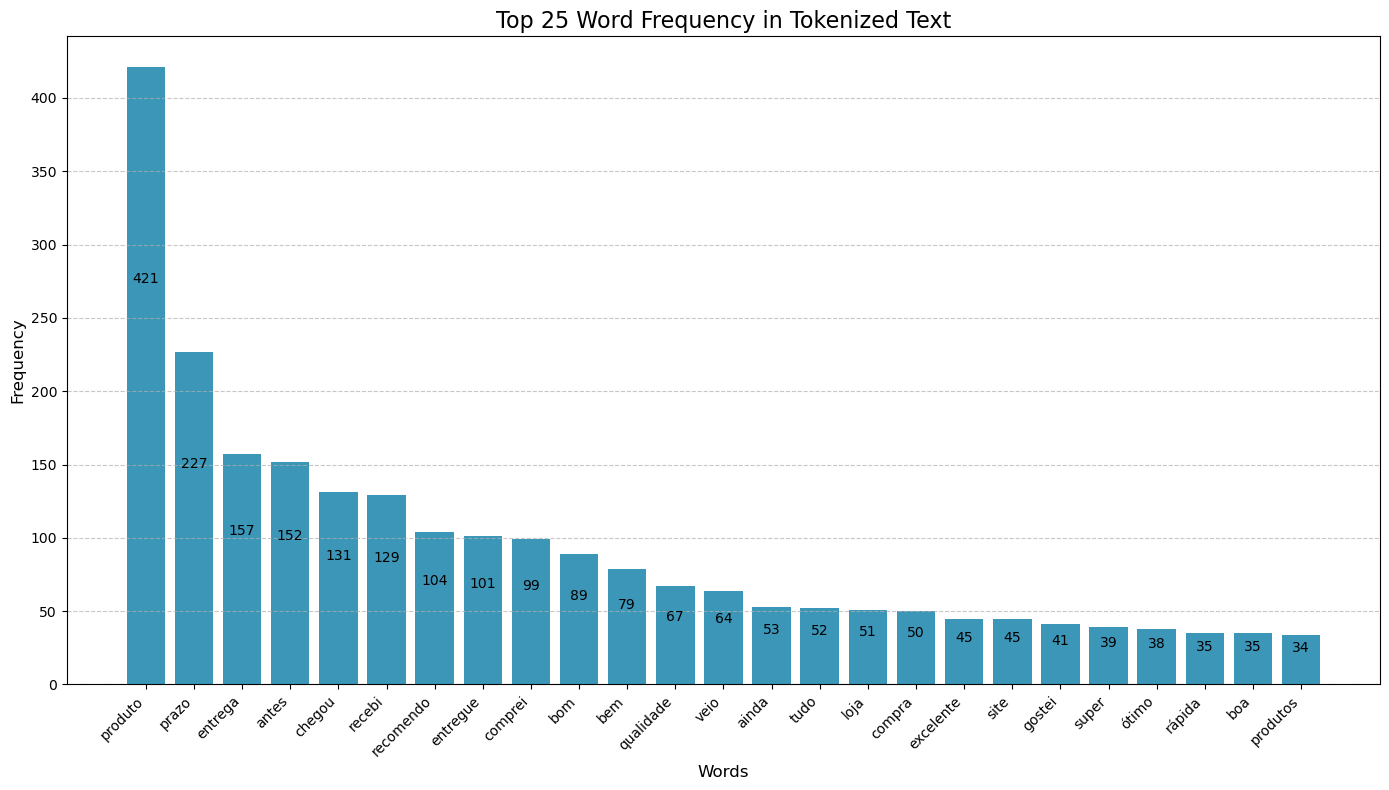

In [38]:
# Function to get top N tokens or n-grams
def get_top_tokens(df, token_column='review_comment_message_tokens', top_n=50):
    all_tokens = [token for tokens in df[token_column] for token in tokens]
    token_counts = Counter(all_tokens)
    return token_counts.most_common(top_n)

# Function to create a DataFrame from frequency counts
def create_frequency_df(counter, columns=['Word', 'Frequency']):
    return pd.DataFrame(counter.items(), columns=columns)

# General plotting function for bar charts
def plot_top_frequencies(df, title, xlabel, column_name):
    plt.figure(figsize=(14, 8))
    bars = plt.bar(df[column_name], df['Frequency'], color=colors[1])
    
    # Add labels
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height() - max(5, bar.get_height() * 0.35), 
                 f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

    # Customize and show plot
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Get top tokens and plot
top_50_tokens = get_top_tokens(nlp_df, 'review_comment_message_tokens', 50)
top_50_tokens_df = create_frequency_df(dict(top_50_tokens))
plot_top_frequencies(top_50_tokens_df.head(25), 'Top 25 Word Frequency in Tokenized Text', 'Words', 'Word')

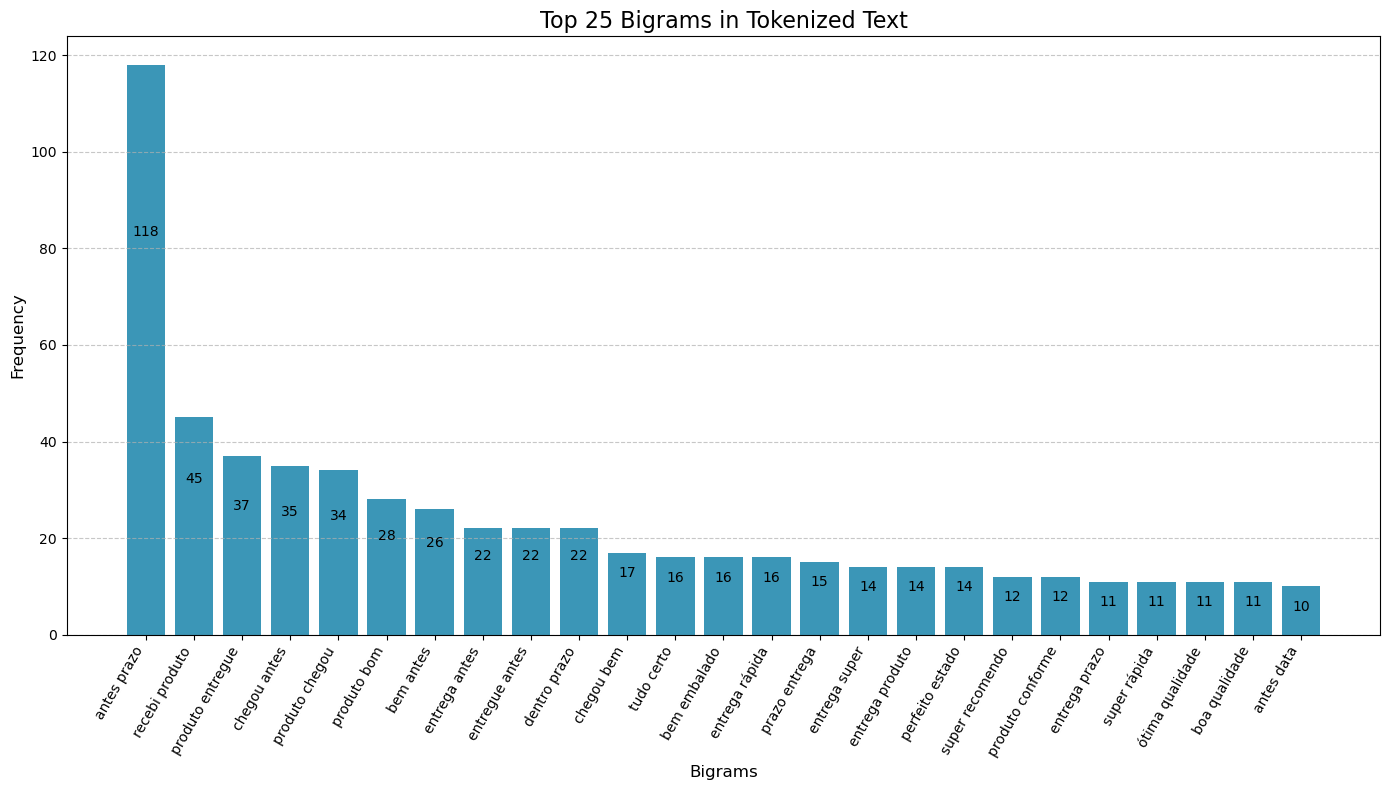

In [39]:
# N-gram generator and frequency counter
def get_top_ngrams(tokens_list, n=2, top_n=25):
    ngram_counts = Counter(
        ngram for tokens in tokens_list if tokens for ngram in ngrams(tokens, n)
    )
    # Create DataFrame directly from the most common n-grams
    return pd.DataFrame(ngram_counts.most_common(top_n), columns=['Bigram', 'Frequency'])

# Generate top 25 bigrams and plot
top_bigrams_df = get_top_ngrams(nlp_df['review_comment_message_tokens'], n=2, top_n=25)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(
    [f'{gram[0]} {gram[1]}' for gram in top_bigrams_df['Bigram']], 
    top_bigrams_df['Frequency'], color=colors[1])

# Add count labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height() - max(5, bar.get_height() * 0.3), 
             f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

# Customize the chart
plt.xlabel('Bigrams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 25 Bigrams in Tokenized Text', fontsize=16)
plt.xticks(rotation=60, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

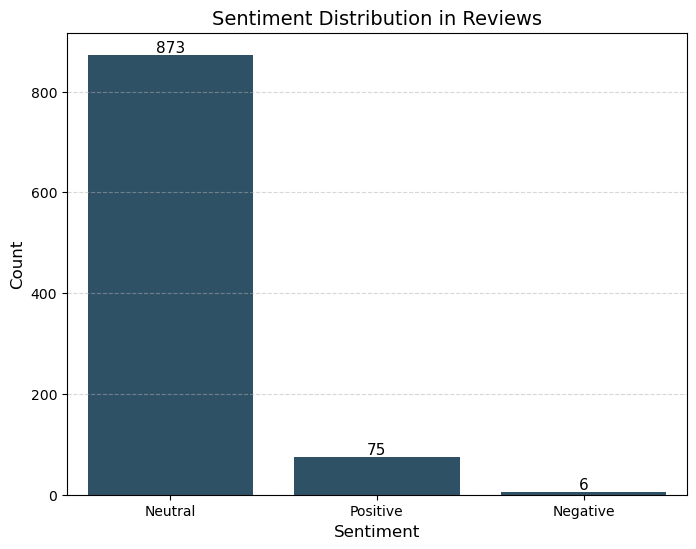

In [40]:
# Plot the sentiment count
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="review_comment_message_clean_sentiment", data=nlp_df)

# Add labels and title
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Sentiment Distribution in Reviews", fontsize=14)

# Display value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Reduce gridline visibility for a cleaner look
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.5)

plt.show()

# 8. Data Preprocessing

In [41]:
X = nlp_df['review_comment_message'] # Text column
y = nlp_df['review_comment_message_clean_sentiment'] # Target column

In [42]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Convert categorical classes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  
y_test_encoded = label_encoder.transform(y_test)

# Check if the conversion was successful
print(f"Unique values ​​in y_train_encoded after encoding: {y_train_encoded}")

# Viewing
label_encoder

Unique values ​​in y_train_encoded after encoding: [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2
 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

LabelEncoder()

In [44]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000) # Optional limit for the number of features

# Transform texts into TF-IDF vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert to dense arrays (if necessary for some models)
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Viewing
vectorizer

TfidfVectorizer(max_features=5000)

# 9. Machine Learning

In [45]:
%%time 

# Initialize models
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=50, max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=45, algorithm="SAMME"),  # Updated
    "XGBClassifier": XGBClassifier(random_state=42),
    "LGBMClassifier": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, 
                                     learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, 
                                     verbosity=-1, verbose=50),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(kernel='linear', random_state=42, probability=True),
    "CatBoostClassifier": CatBoostClassifier(verbose=0, random_state=42)
}

CPU times: total: 0 ns
Wall time: 11.4 ms


In [46]:
# Train models and calculate accuracy scores
results = []
for name, model in models.items():
    model.fit(X_train_dense, y_train_encoded)
    train_accuracy = accuracy_score(y_train_encoded, model.predict(X_train_dense))
    test_accuracy = accuracy_score(y_test_encoded, model.predict(X_test_dense))
    results.append({"Model": name, "Training Accuracy": train_accuracy, "Testing Accuracy": test_accuracy})
    
pd.DataFrame(results)

Model  Training Accuracy  Testing Accuracy
0                   GaussianNB           0.846658          0.748691
1       DecisionTreeClassifier           1.000000          0.984293
2       RandomForestClassifier           1.000000          0.942408
3           LogisticRegression           0.944954          0.931937
4           AdaBoostClassifier           0.958060          0.952880
5                XGBClassifier           0.998689          0.968586
6               LGBMClassifier           0.986894          0.942408
7         KNeighborsClassifier           0.943644          0.942408
8   GradientBoostingClassifier           1.000000          0.984293
9                          SVC           0.976409          0.973822
10          CatBoostClassifier           1.000000          0.984293

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


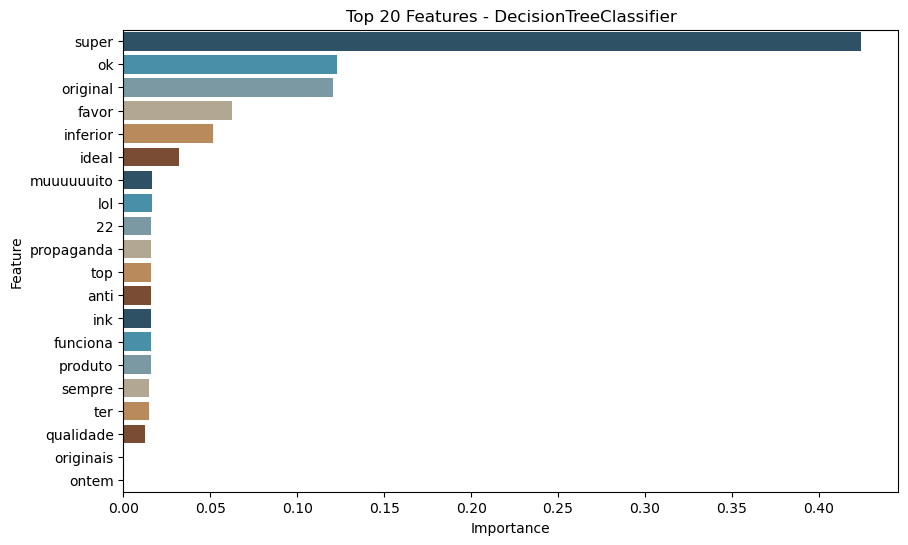

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


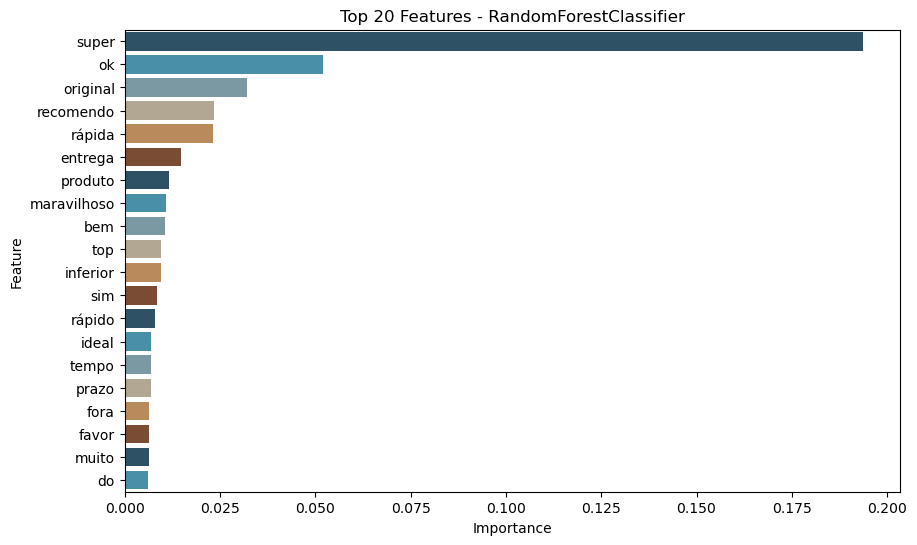

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


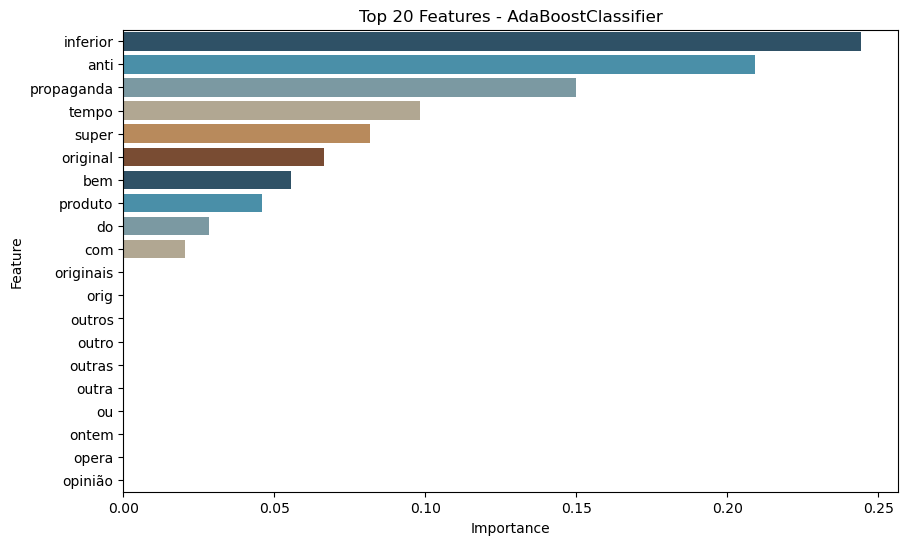

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


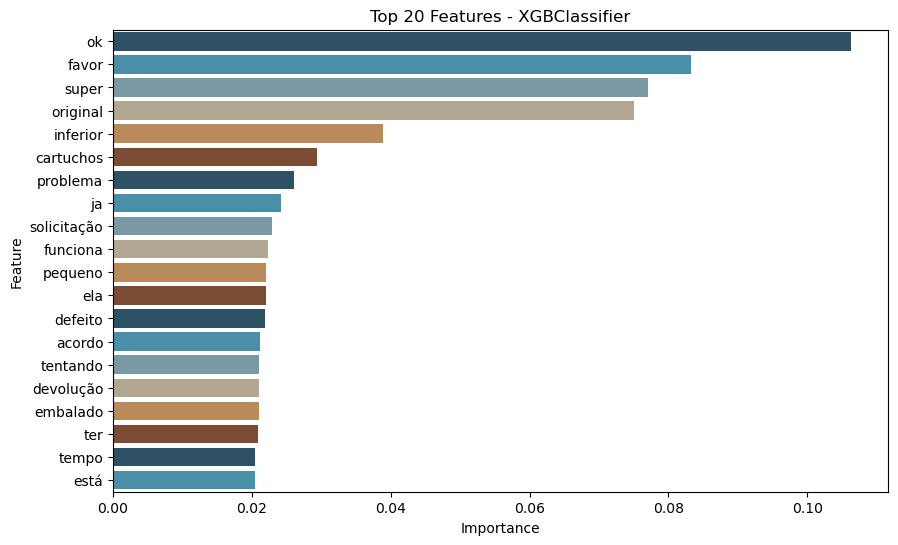

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


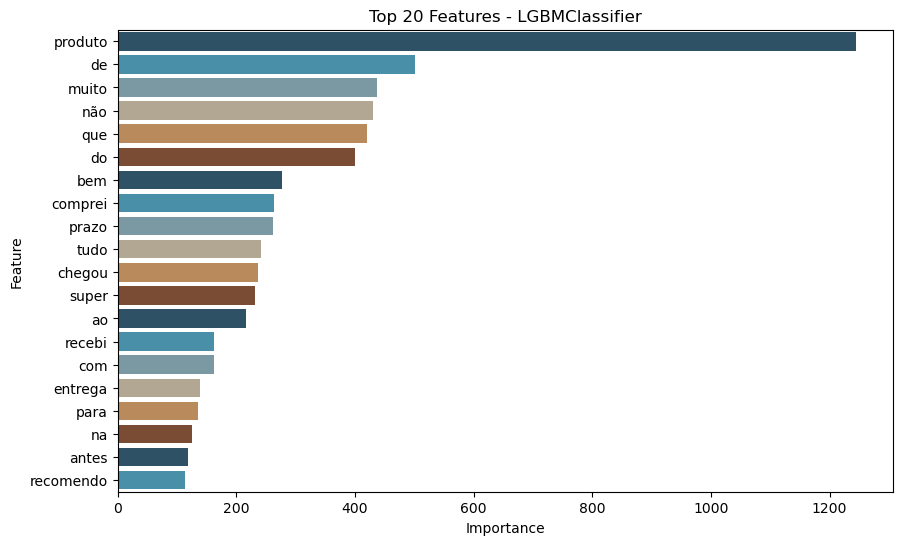

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


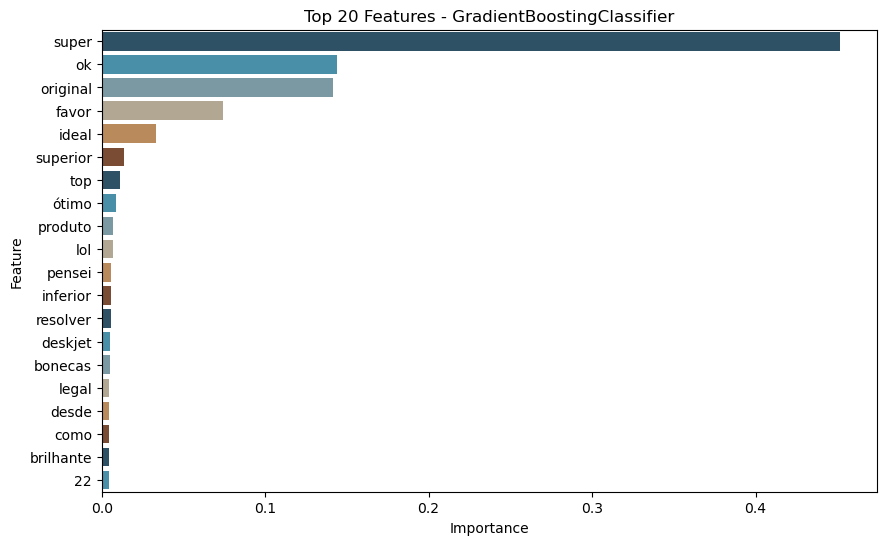

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_10132\2473232973.py:10: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


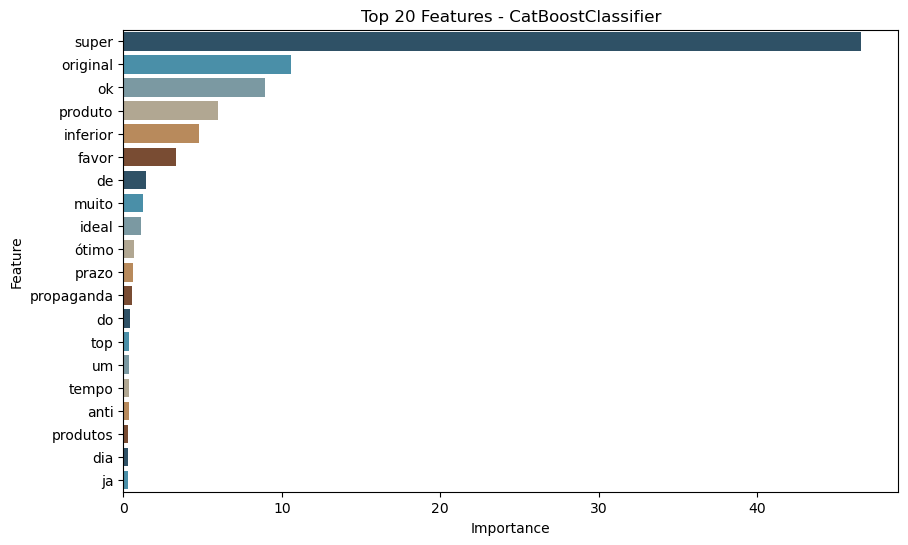

In [47]:
feature_importances = []
feature_names = vectorizer.get_feature_names_out()

for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False).head(20)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
        plt.title(f"Top 20 Features - {name}")
        plt.show()


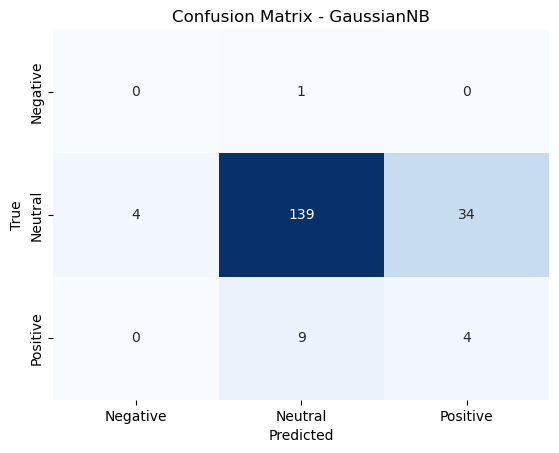

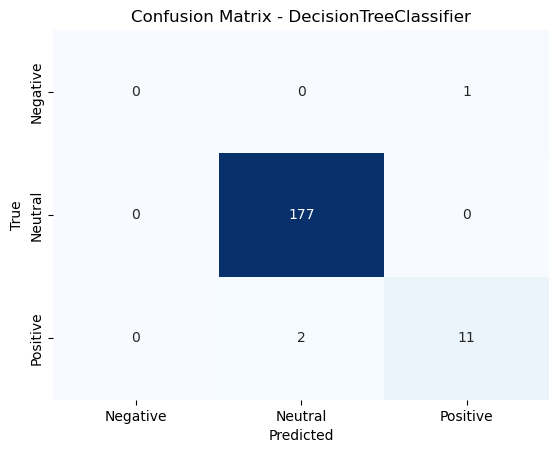

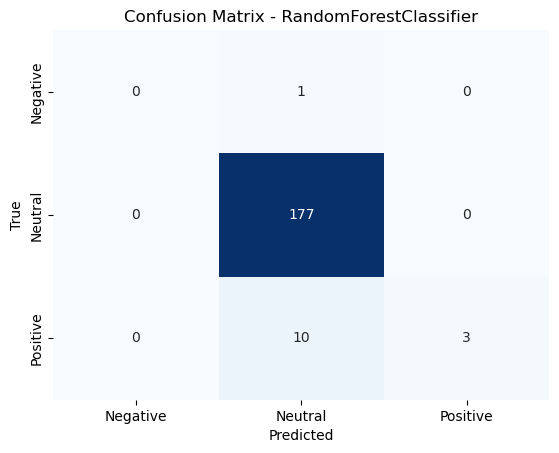

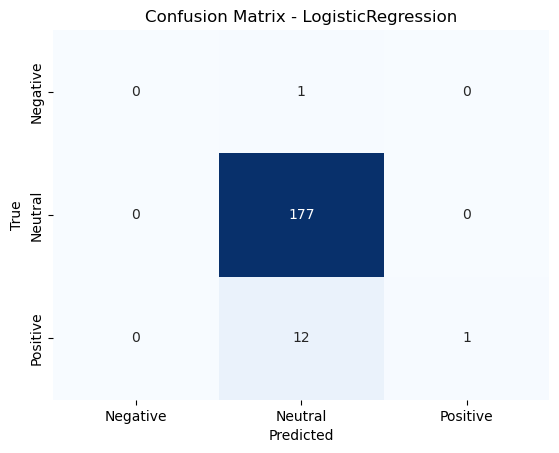

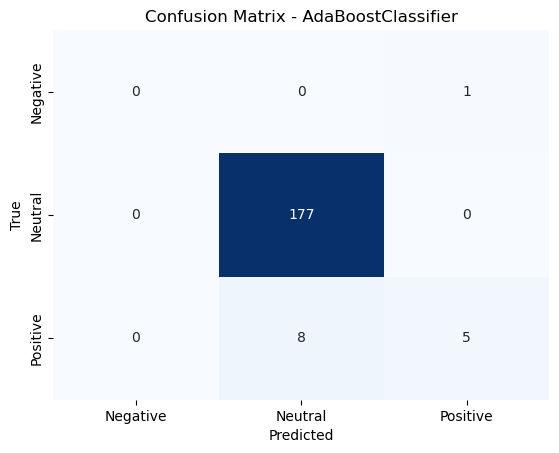

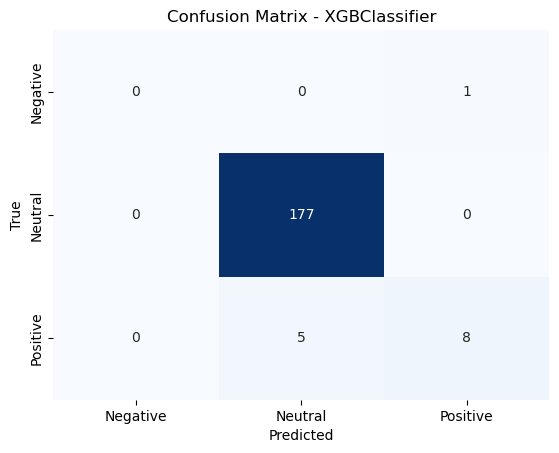

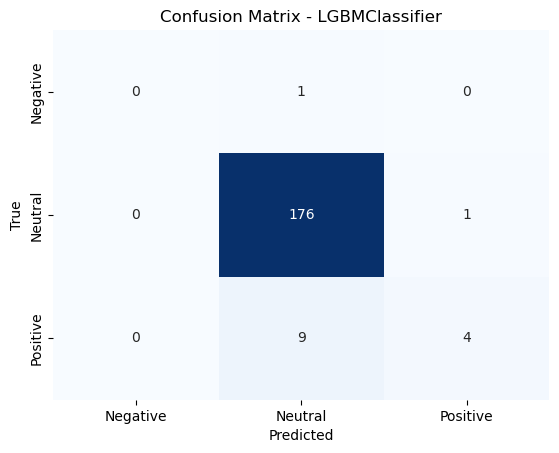

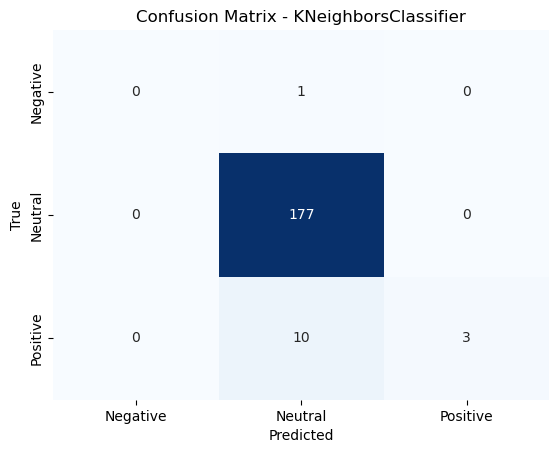

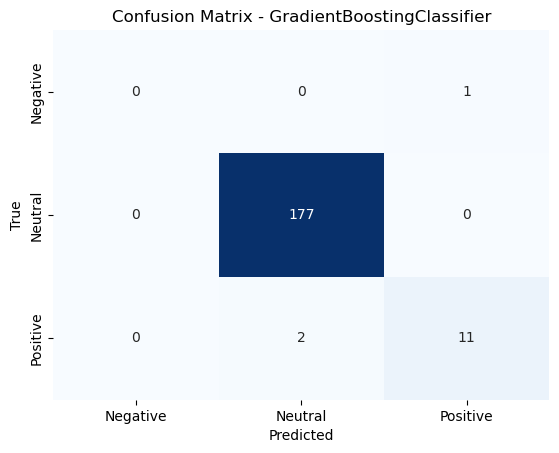

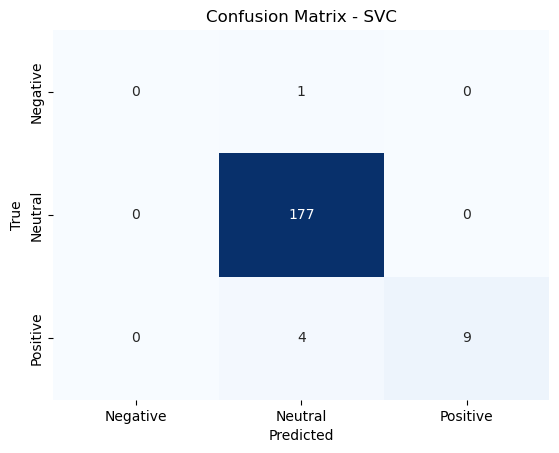

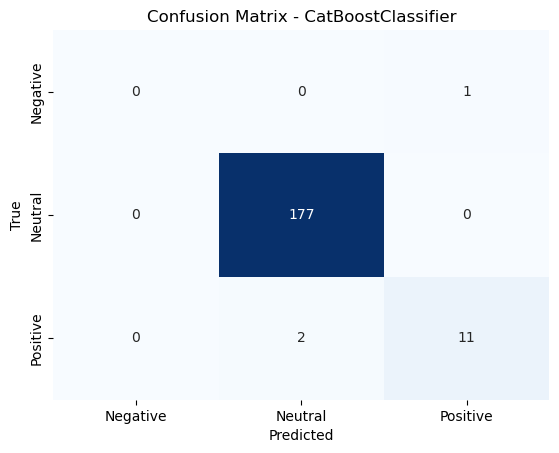

In [48]:
# Confusion matrix plots
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    cm = confusion_matrix(y_test_encoded, y_pred)

    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


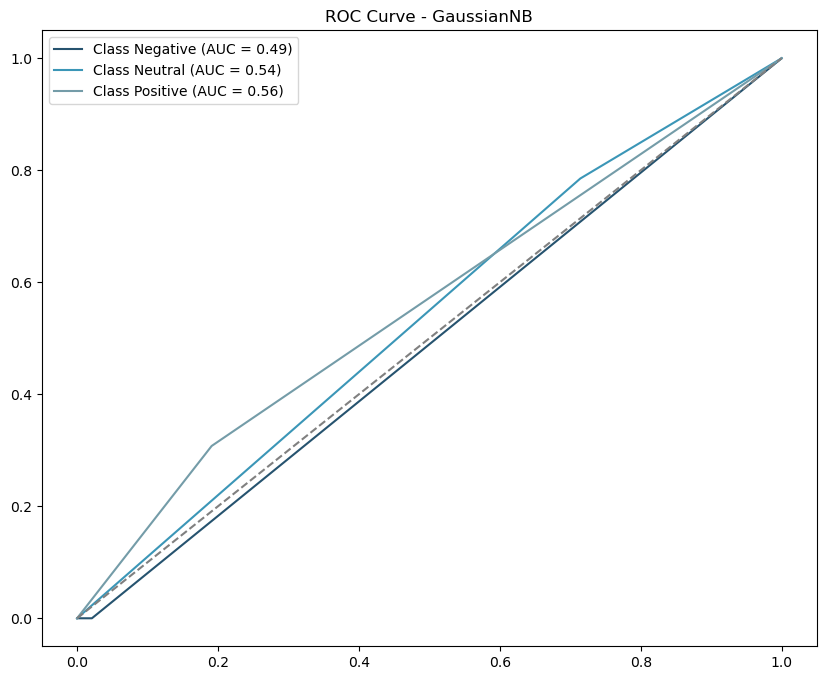

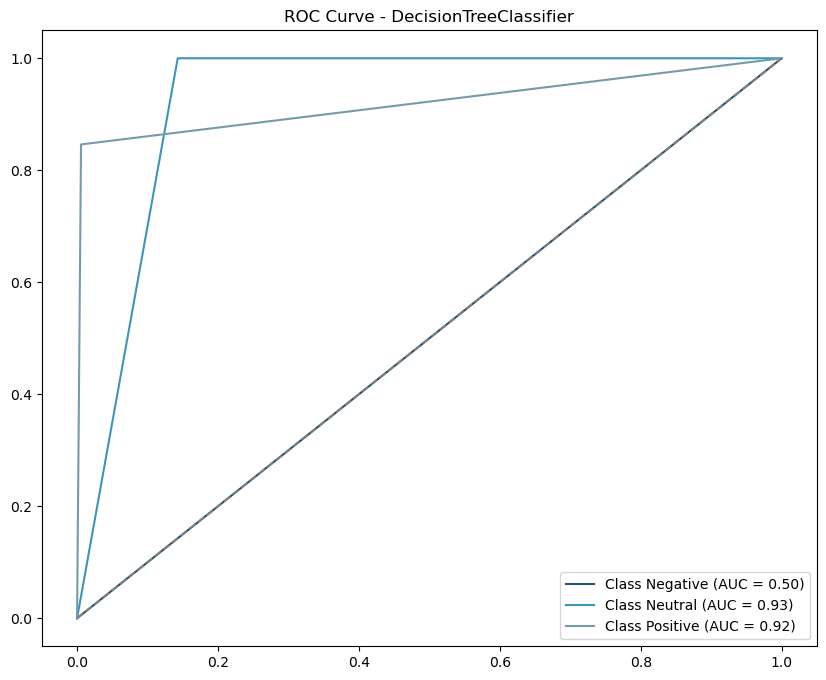

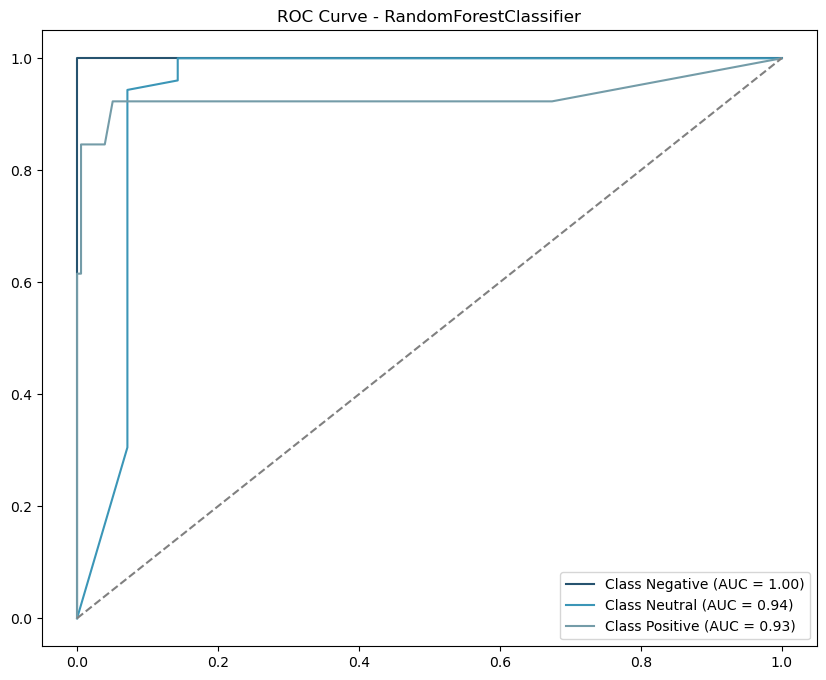

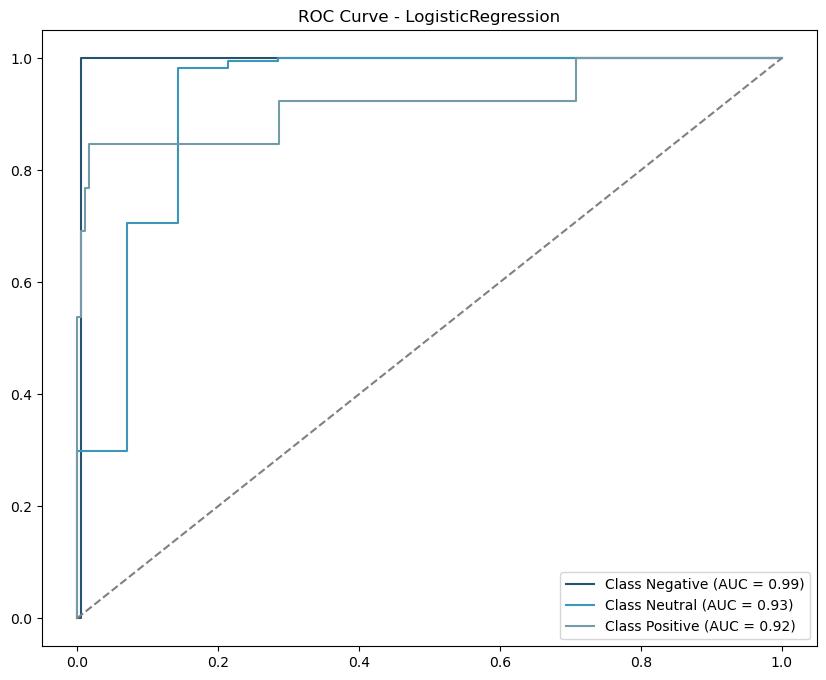

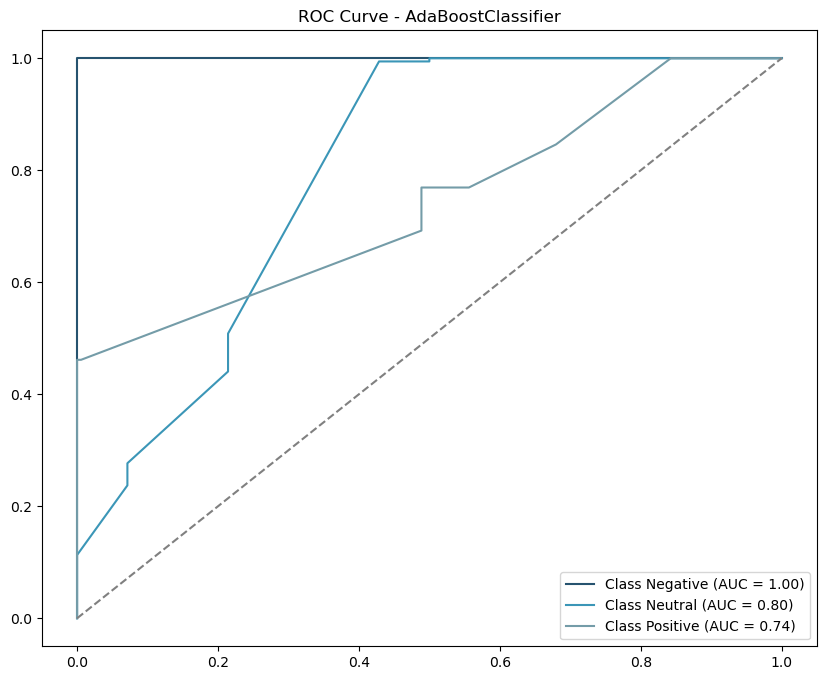

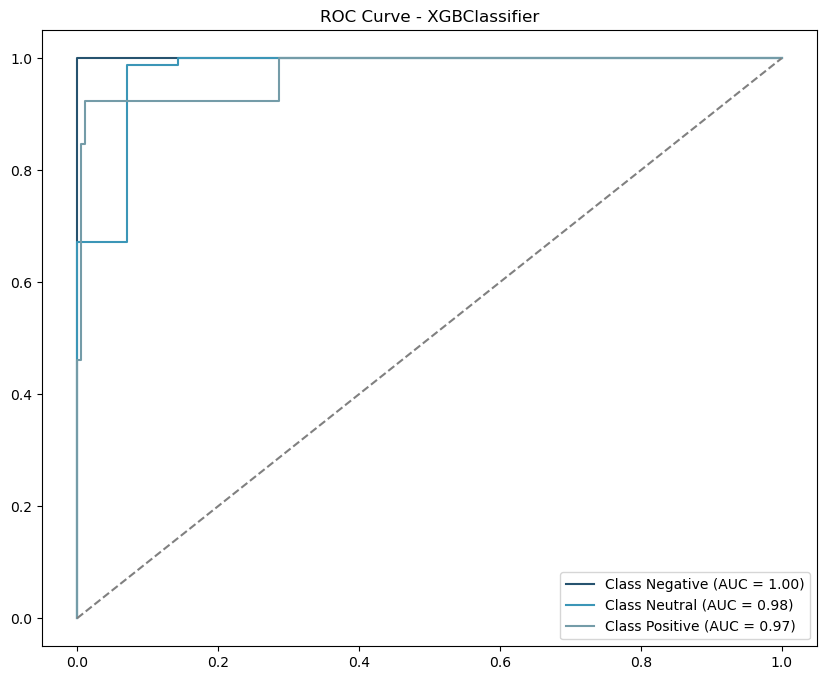

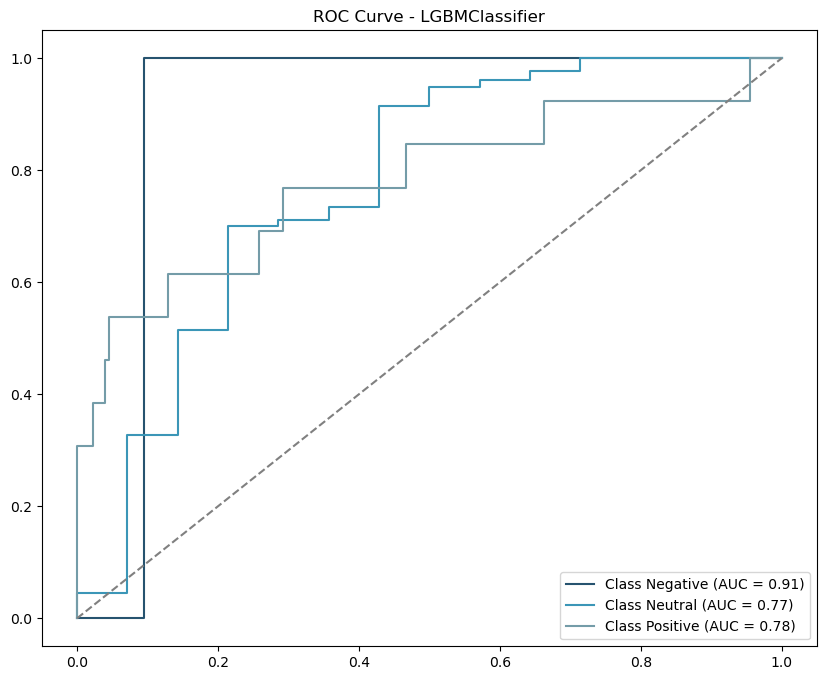

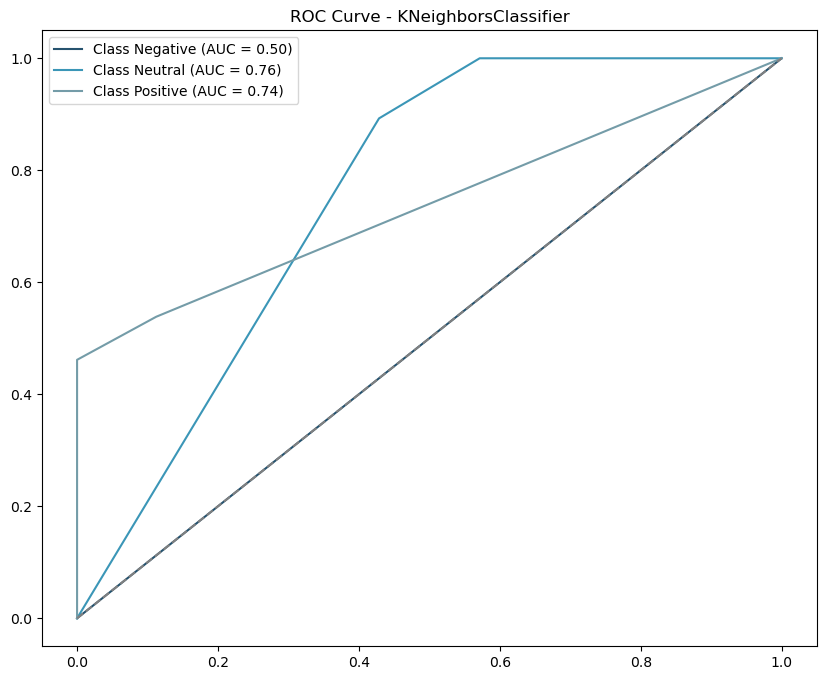

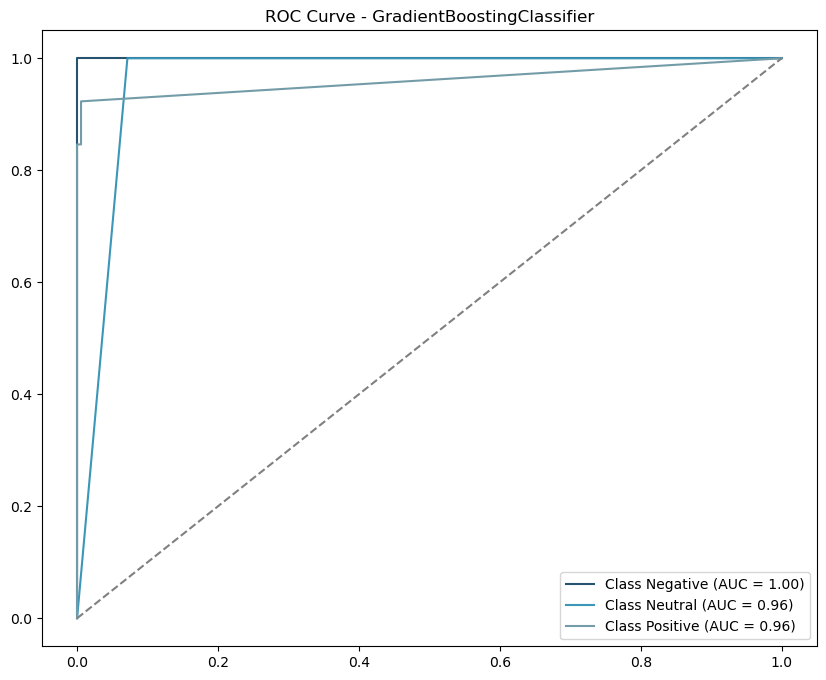

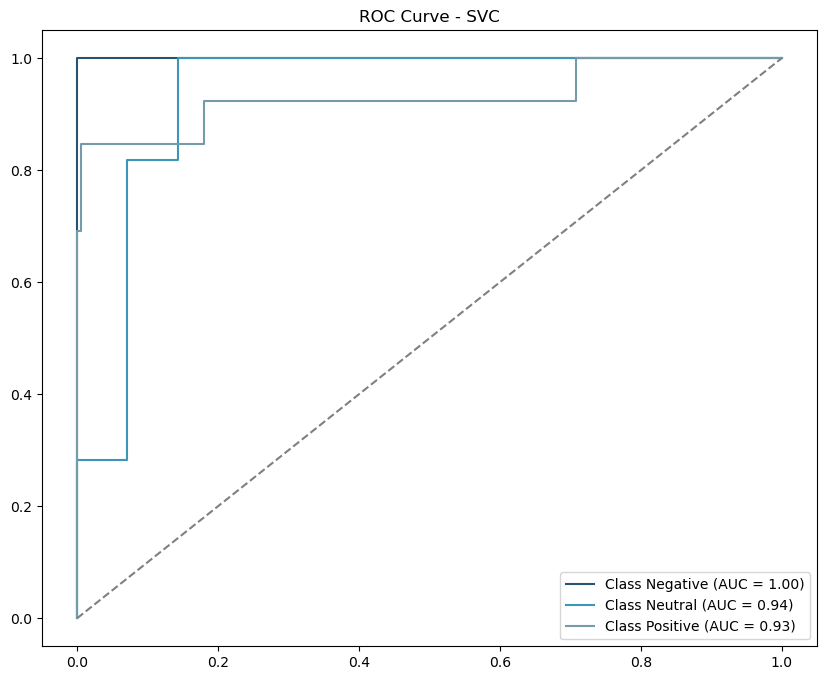

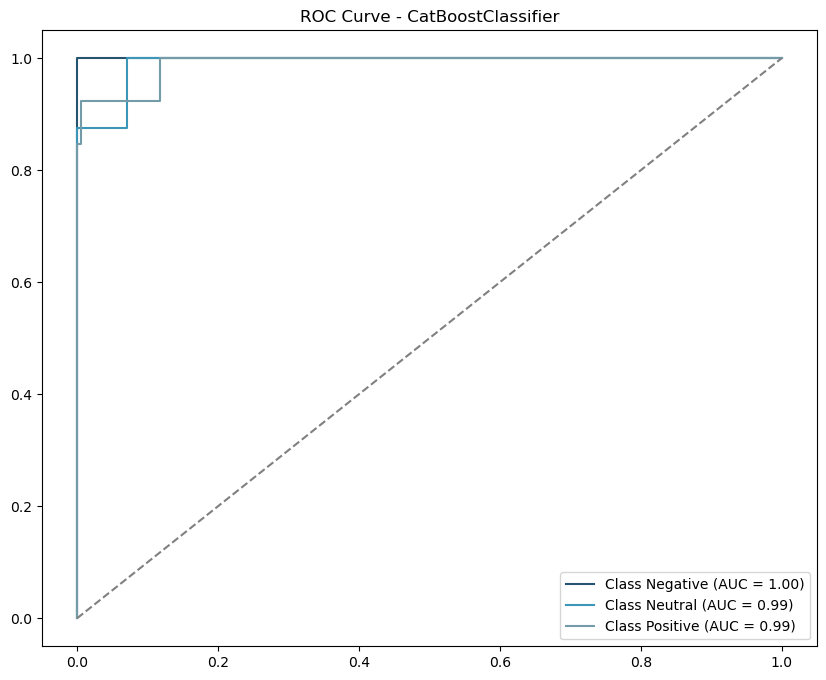

In [49]:
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
n_classes = y_test_binarized.shape[1]

for name, model in models.items():
    plt.figure(figsize=(10, 8))
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_dense)
    else:
        y_decision = model.decision_function(X_test_dense)
        y_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())
    
    for class_id in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_prob[:, class_id])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {label_encoder.inverse_transform([class_id])[0]} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

In [50]:
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    print(f"Classification Report for {name}")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

Classification Report for GaussianNB
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.93      0.79      0.85       177
    Positive       0.11      0.31      0.16        13

    accuracy                           0.75       191
   macro avg       0.35      0.36      0.34       191
weighted avg       0.87      0.75      0.80       191

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.99      1.00      0.99       177
    Positive       0.92      0.85      0.88        13

    accuracy                           0.98       191
   macro avg       0.64      0.62      0.62       191
weighted avg       0.98      0.98      0.98       191

Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00     

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\s

Classification Report for AdaBoostClassifier
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.96      1.00      0.98       177
    Positive       0.83      0.38      0.53        13

    accuracy                           0.95       191
   macro avg       0.60      0.46      0.50       191
weighted avg       0.94      0.95      0.94       191

Classification Report for XGBClassifier
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.97      1.00      0.99       177
    Positive       0.89      0.62      0.73        13

    accuracy                           0.97       191
   macro avg       0.62      0.54      0.57       191
weighted avg       0.96      0.97      0.96       191

Classification Report for LGBMClassifier
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
   

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\s

Classification Report for SVC
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.97      1.00      0.99       177
    Positive       1.00      0.69      0.82        13

    accuracy                           0.97       191
   macro avg       0.66      0.56      0.60       191
weighted avg       0.97      0.97      0.97       191



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for CatBoostClassifier
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.99      1.00      0.99       177
    Positive       0.92      0.85      0.88        13

    accuracy                           0.98       191
   macro avg       0.64      0.62      0.62       191
weighted avg       0.98      0.98      0.98       191



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Collect performance metrics
performance_data = []
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test_encoded, y_pred),
        "Precision": precision_score(y_test_encoded, y_pred, average='weighted'),
        "Recall": recall_score(y_test_encoded, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test_encoded, y_pred, average='weighted')
    }
    performance_data.append(metrics)

# Convert list of dictionaries to DataFrame
performance_df = pd.DataFrame(performance_data)

# Apply highlight to numeric columns only
highlighted_df = (
    performance_df.style
    .highlight_max(
        subset=performance_df.select_dtypes(include='number').columns,  # Only numeric columns
        color="lightblue", 
        axis=0
    )
)

# Display the styled DataFrame
highlighted_df

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\s